In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import folium
import matplotlib.cm as cm
from rasterio.transform import from_origin
import pandas as pd
from tqdm import tqdm
import matplotlib
from rasterio.warp import transform_bounds

In [5]:
paths = [
    'raster_align_LH/temp1_LH_align.tif',
    'raster_align_LH/temp2_LH_align.tif',
    'raster_align_LH/temp3_LH_align.tif',
    'raster_align_LH/temp4_LH_align.tif',
    'raster_align_LH/temp5_LH_align.tif',
    'raster_align_LH/temp6_LH_align.tif',
    'raster_align_LH/temp7_LH_align.tif',
    'raster_align_LH/temp8_LH_align.tif',
    'raster_align_LH/PPI_LH_align.tif',
    'raster_clean_LH/FAPAR_LH_clean.tif'
]

In [3]:
file_names = [
    'temp1_LH.tif',
    'temp2_LH.tif',
    'temp3_LH.tif',
    'temp4_LH.tif',
    'temp5_LH.tif',
    'temp6_LH.tif',
    'temp7_LH.tif',
    'temp8_LH.tif',
    'PPI_LH.tif',
    'FAPAR_LH.tif'
]

In [2]:
def decoupe_raster(path, output_filename, haut, bas, gauche, droite) :
      #ouverture du fichier et récupération des infos
    with rasterio.open(path)  as data:
        band1 = data.read(1)
        crs= data.crs
        bounds = data.bounds
        dtype = data.dtypes[0]
        count= data.count
        no_data = data.nodata
        resolution_x = data.res[0]  
        resolution_y = data.res[1]
        transform = data.transform
        ville = band1[haut:bas, gauche:droite]

    #calcul des nouvelles bounds
        window = rasterio.windows.Window(gauche, haut, ville.shape[1], ville.shape[0]) 
        # Calculez les bounds de la sous-image  en utilisant le transform
        sub_image_bounds = rasterio.windows.bounds(window, transform=transform)  
        print(sub_image_bounds)
    #définition du nouveau transform
    top_left_x = sub_image_bounds[0]
    top_left_y = sub_image_bounds[3]
    new_transform = from_origin(top_left_x, top_left_y, resolution_x, resolution_y)
    print(new_transform)

    #enregirstement du raster découper
    with rasterio.open(output_filename, 'w', driver='GTiff', width=ville.shape[1], height=ville.shape[0], count=count, dtype=dtype, transform=new_transform, crs=crs, bounds=sub_image_bounds, nodata=no_data) as dst:
        dst.write(ville, 1)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


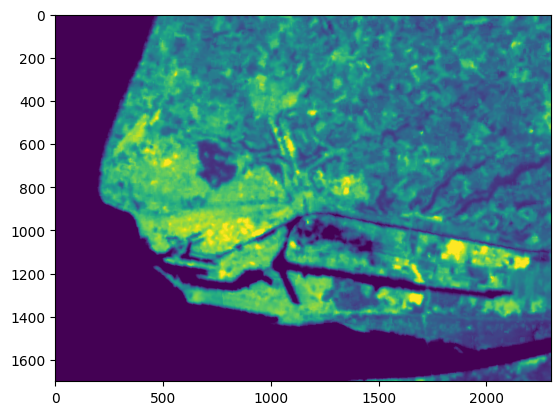

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


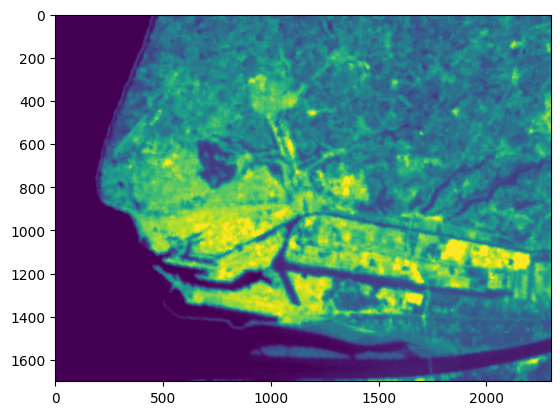

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


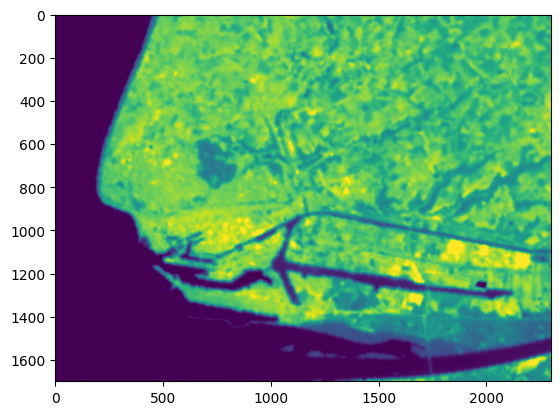

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


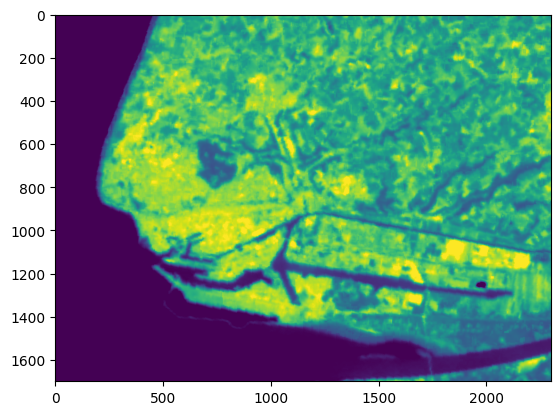

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


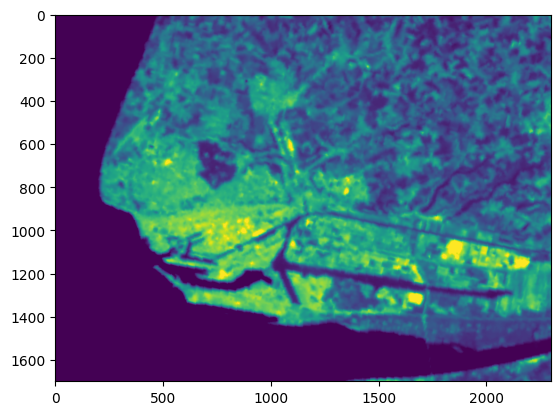

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


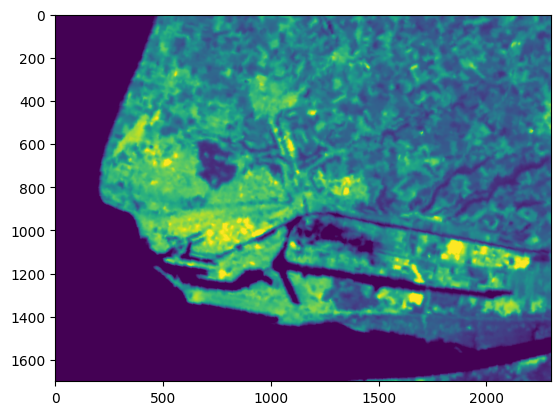

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


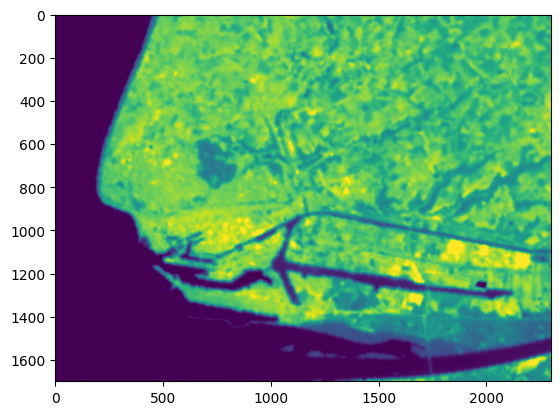

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


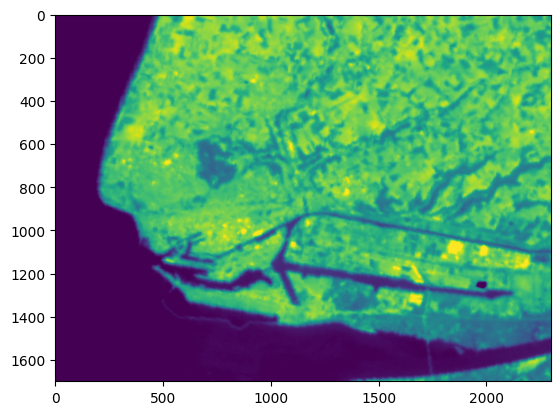

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


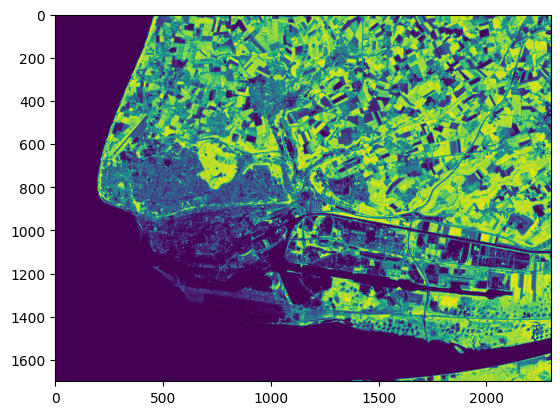

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 3500, 'height': 2500, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 714960.0,
       0.0, -10.0, 5500020.0)}
BoundingBox(left=714960.0, bottom=5475020.0, right=749960.0, top=5500020.0)


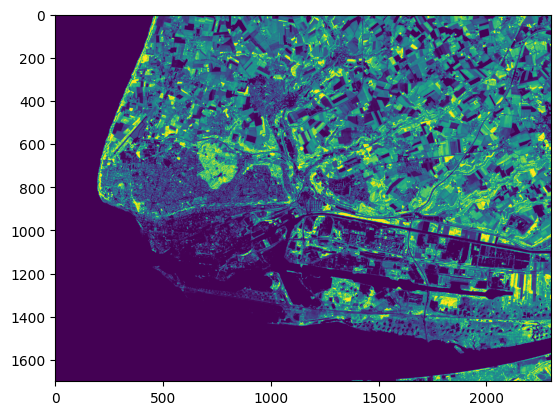

In [13]:
# coordonée temp
haut = 300
bas = 2000
gauche = 500
droite = 2800

for i in range(10) :
    with rasterio.open(paths[i])  as data:
        band1 = data.read(1)
        print(data.meta)
        print(data.bounds)
        #show(band1)
        #plt.figure(figsize=(10,10))
        show(band1[haut:bas, gauche:droite])

In [14]:
for i in range(10) :
    decoupe_raster(paths[i], file_names[i], haut, bas, gauche, droite)

(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0.00,-10.00, 5497020.00|
| 0.00, 0.00, 1.00|
(719960.0, 5480020.0, 742960.0, 5497020.0)
| 10.00, 0.00, 719960.00|
| 0